<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center>
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center>

<center> <h1> </h1> </center>

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="300" height="400"></center>

<center> <h2>EXPOSICION FINAL TRABAJO GRUPAL </h2> </center>

<center> <h1>Curso : Computación 2</h1> </center>

<center> <h1>INTEGRANTES</h1> </center>

> Arana Puma Pedro Jesus

> Apaza Quispe Ivan Francisco

> Bolivar Huamani Fernando Kevin

> Calatayu Huamani Leonardo Carlo

> Pari Acuña Luis Eduardo


<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ MACHINE LEARNING- MODELO K-MEANS </font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Importar librerías</font>**

</td>
</tr>
</table>

In [1]:
#Se importan la librerias a utilizar
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Importacion de la Base de Datos 'Base_datos.csv'</font>**

</td>
</tr>
</table>

Este es un conjunto de datos de identificación de vidrios de la UCI. Contiene 10 atributos, incluida la identificación. La respuesta es tipo vidrio (7 valores discretos)

Contenido
Información de atributos:

Número de identificación: 1 a 214 (eliminado del archivo CSV)

RI: índice de refracción

Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, al igual que los atributos 4-10)

Mg: Magnesio

Aluminio: Aluminio

Si: Silicio

K: potasio

Ca: Calcio

Ba: Bario

Fe: Hierro

Tipo de vidrio: (atributo de clase)

-- 1 edificio_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehículos_ventanas_flotantes_procesadas

-- 4 Vehicle_windows_non_float_processed (ninguno en esta base de datos)

-- 5 contenedores

-- 6 vajillas

-- 7 faros


https://www.kaggle.com/datasets/uciml/glass

Los datos esta almacenados en archivo `Base_datos.csv` que se encuentra en el directorio `data`

<img src="https://ivanchavez.me/wp-content/uploads/2022/08/1_bQYZ7fp_wcjWFwpBbcRS-Q.png" width="400" height="200" />

In [2]:
#Importamos los datos de la misma librería de scikit-learn
dataset = pd.read_csv('/home/leonardo/Documentos/data/Base_datos.csv')


In [3]:
#LOS 5 PRIMEROS DATOS
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#LOS 5 ULTIMOS DATOS
dataset.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
#ALMACENAMOS LAS ETIQUETAS EN UN VECTOR
y = dataset[dataset.columns[-1]].to_numpy()

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Eliminamos la Columna de etiquetas</font>**

</td>
</tr>
</table>

In [7]:
#ELIMINAMOS LA ETIQUETA
elemento = dataset.drop(['Type'], axis=1 )

In [8]:
#VERIFICAMOS SIN ETIQUETAS
elemento.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Exploración de Datos</font>**

</td>
</tr>
</table>

In [9]:
#NUMERO DE DATOS POR COLUMNA
elemento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [10]:
#LAS ETIQUETAS DE CADA COLUMNA
elemento.dtypes

RI    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object

In [11]:
#LA CANTIDAD DE FILAS Y COLUMNAS
elemento.shape

(214, 9)

In [12]:
#LA CANTIDAD DE DATOS QUE HAY EN LOS DATASET
print('Cantidad de datos: ')
elemento.count()

Cantidad de datos: 


RI    214
Na    214
Mg    214
Al    214
Si    214
K     214
Ca    214
Ba    214
Fe    214
dtype: int64

In [13]:
#LA EXISTENCIA DE VALORES NULOS
elemento.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [14]:
#EL NOMBRE DE LAS COLUMNAS
elemento.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [15]:
#Obtener valores estadisticos de la data importada
elemento.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [16]:
#Creamos una base de datos normalizada
elemento_train = elemento

In [17]:
#5 primeras columnas de la data normalizada
elemento_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [18]:
#5 Todas las columnas de la data normalizada
elemento_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Cantidad optima de Cluster</font>**

</td>
</tr>
</table>

In [19]:
wcss = []   #almacenaran los valores de WCSS que va hallando

for i in range(1,19):    #19 cantidad de agrupaciones
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(elemento_train)          #Entrenamos Modelo Kmenas a la base de datos
    wcss.append(kmeans.inertia_)       #Ayuda a ver que tan buena es la prediccion

Graficamos los resultados **WCSS** para formar el Codo de Jambú

<function matplotlib.pyplot.show(close=None, block=None)>

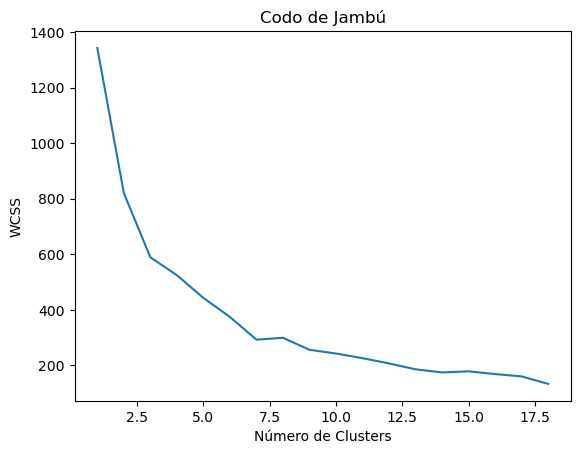

In [20]:
plt.plot(range(1,19),wcss)
plt.title('Codo de Jambú')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')   #WCSS Es un indicador de que tan similiar puedeb ser kis datis dentro de los cluster
plt.show

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Aplicamos el modelo Kmeans a la base de datos</font>**

</td>
</tr>
</table>

In [21]:
clustering = KMeans(n_clusters = 7,max_iter = 300)
clustering.fit(elemento_train)

KMeans(n_clusters=7)

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Agreguemos la clasificación al archivo original</font>**

</td>
</tr>
</table>

In [22]:
elemento['KMeans_Cluster'] = clustering.labels_     #Los resultados del clustering se guardan en labels_ dentro del modelo
elemento.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,KMeans_Cluster
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,6
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [23]:
elemento.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,KMeans_Cluster
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,2
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,2
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,2
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,2
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,2


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Graficamos los clusters formados</font>**

</td>
</tr>
</table>

In [24]:
from sklearn.decomposition import PCA

#Reemplazar a dos componentes
pca = PCA(n_components=2)
pca_elemento = pca.fit_transform(elemento_train)
pca_elemento_df = pd.DataFrame(data = pca_elemento, columns = ['Componente_1','Componente_2'])
pca_nombre_elemento = pd.concat([pca_elemento_df, elemento[['KMeans_Cluster']]],axis = 1)

pca_nombre_elemento

,Componente_1,Componente_2,KMeans_Cluster
0,3.366259,-3.263466,6
1,-2.146322,-0.605335,0
2,-2.221401,-0.509155,0
3,-2.088743,-0.455579,0
4,-2.174464,-0.421485,0
...,...,...,...
209,1.067447,2.185822,2
210,0.856961,1.756690,2
211,0.768826,1.874180,2
212,0.761349,1.905933,2


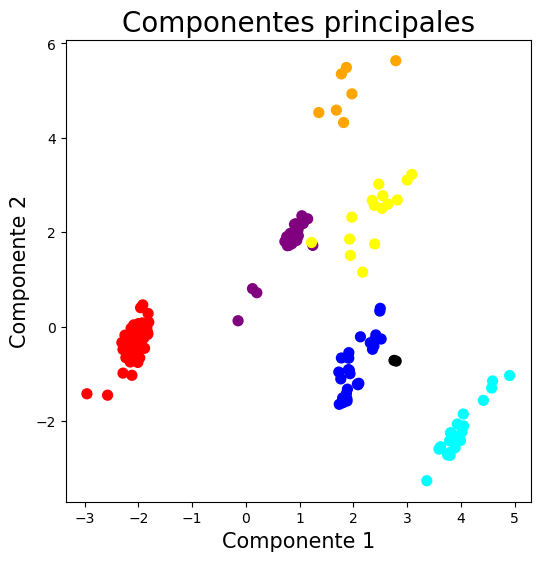

In [25]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1',fontsize = 15)
ax.set_ylabel('Componente 2',fontsize = 15)
ax.set_title('Componentes principales',fontsize = 20)

color_theme = np.array(['red','orange','purple','yellow','blue','black','cyan'])
ax.scatter(x = pca_nombre_elemento.Componente_1, y= pca_nombre_elemento.Componente_2,
           c=color_theme[pca_nombre_elemento.KMeans_Cluster], s=50)

plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Verificación del modelo desarrollo </font>**

</td>
</tr>
</table>

In [26]:
#Enviamos a "predicciones" los niveles de clustering
predicciones = clustering.labels_

In [27]:
#Vemos la comparacion con "y"
predicciones

array([6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 0, 6,
       0, 4, 0, 6, 6, 4, 6, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6,
       4, 4, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 6, 6, 1, 1, 1, 3, 3,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 0,
       0, 0, 0, 6, 4, 4, 4, 4, 6, 0, 4, 3, 3, 3, 3, 3, 3, 5, 5, 3, 4, 3,
       4, 4, 4, 4, 2, 2, 3, 3, 2, 0, 0, 4, 6, 6, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
from sklearn import metrics
score = metrics.adjusted_rand_score(y,predicciones)

In [29]:
#"Vemos el grado de precision"
print(score)

0.23707012880211717
